In [21]:
import pandas as pd
import numpy as np
import gc

In [22]:
import torch
import torch.nn.functional as F

class LinearRegressor(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(LinearRegressor, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.relu1 = torch.nn.ReLU()
        self.relu2 = torch.nn.ReLU()
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.hidden3 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer
        self.dropout = torch.nn.Dropout(p=0.2)

    def forward(self, x):
        # x = self.relu1(self.hidden(x))      # activation function for hidden layer
        # x = self.relu2(self.hidden2(x))
        x = F.tanh(self.hidden(x))
        x = self.dropout(x)
        x = self.predict(x)             # linear output
        return x


In [23]:
# ruddit = pd.read_csv("/content/drive/MyDrive/Jigsaw/ruddit_with_text.csv")
# print(len(ruddit))
# ruddit = ruddit[ruddit["txt"] != "[deleted]"]
# print(len(ruddit))
# ruddit = ruddit[["txt", "offensiveness_score"]]
# ruddit.columns = ["text", "y"]
# ruddit["y"] = (ruddit["y"] - ruddit["y"].min()) / (ruddit["y"].max() - ruddit["y"].min())

# # Divide the resulting cleared dataframe by 7 and save each in a separate output csv file.
# n_folds = 5  # number of folders

# frac_1 = 0.7  # for all categories we take 70% of the original amount

# for fld in range(n_folds):  
#     print(f'Fold: {fld}') 
#     tmp_df = ruddit.sample(frac=frac_1, random_state = 10*(fld+1))
#     tmp_df.to_csv(f'/content/drive/MyDrive/Jigsaw/ruddit_train_fld{fld}.csv', index=False)
#     res_df = ruddit.drop(tmp_df.index)
#     res_df.to_csv(f"/content/drive/MyDrive/Jigsaw/ruddit_valid_fld{fld}.csv")
  




 ****************************** FOLD: 0 ******************************
Feature size 32204, sample size 3997


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Training loss is 0.09733958542346954, while Validation loss is 0.0679754838347435
Training loss is 0.029346464201807976, while Validation loss is 0.02826630510389805
Training loss is 0.01750195026397705, while Validation loss is 0.018535584211349487
Training loss is 0.011244518682360649, while Validation loss is 0.015423568896949291
Training loss is 0.008402383886277676, while Validation loss is 0.014315769076347351
Training loss is 0.00696180947124958, while Validation loss is 0.014423482120037079
Training loss is 0.005801999941468239, while Validation loss is 0.01469328161329031


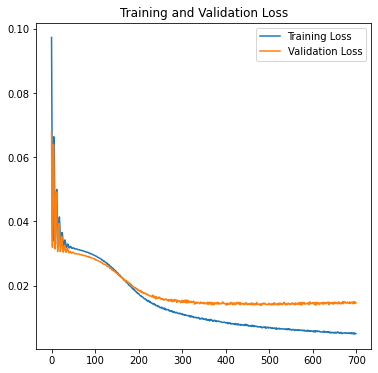




 ****************************** FOLD: 1 ******************************
Feature size 31965, sample size 3997


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Training loss is 0.44865578413009644, while Validation loss is 0.25813865661621094
Training loss is 0.03200381249189377, while Validation loss is 0.028970448300242424
Training loss is 0.024000274017453194, while Validation loss is 0.023026734590530396
Training loss is 0.013420481234788895, while Validation loss is 0.015874678269028664
Training loss is 0.01001401711255312, while Validation loss is 0.01417809072881937
Training loss is 0.008139745332300663, while Validation loss is 0.014078618958592415
Training loss is 0.006841928698122501, while Validation loss is 0.013661323115229607


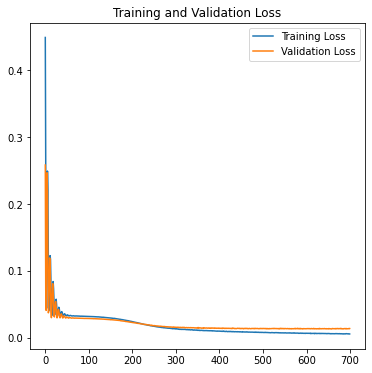




 ****************************** FOLD: 2 ******************************
Feature size 32244, sample size 3997


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Training loss is 0.08634039014577866, while Validation loss is 0.06009415164589882
Training loss is 0.028262069448828697, while Validation loss is 0.027323152869939804
Training loss is 0.01573409140110016, while Validation loss is 0.017545342445373535
Training loss is 0.010636300779879093, while Validation loss is 0.01449926570057869
Training loss is 0.008092359639704227, while Validation loss is 0.013882315717637539
Training loss is 0.006626388523727655, while Validation loss is 0.01380851585417986
Training loss is 0.005766884423792362, while Validation loss is 0.013493234291672707


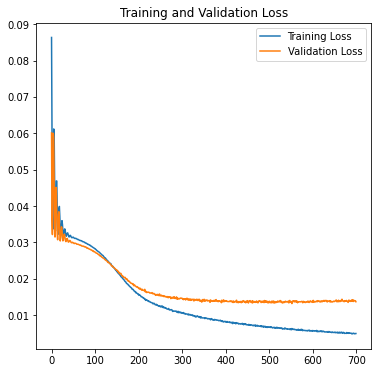

In [24]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from torch.autograd import Variable
import matplotlib.pyplot as plt

n_folds = 3

EPOCHS = 700
for fold in range(n_folds):
  print("\n\n")
  print(f' ****************************** FOLD: {fold} ******************************')
  df_train = pd.read_csv(f"/content/drive/MyDrive/Jigsaw/ruddit_train_fld{fold}.csv")
  df_valid = pd.read_csv(f"/content/drive/MyDrive/Jigsaw/ruddit_valid_fld{fold}.csv")
  # df_train["y"] = df_train["y"] * 100
  # df_valid["y"] = df_valid["y"] * 100
  union = FeatureUnion([
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
    ])
  features_train = union.fit_transform(df_train["text"])
  features_size = features_train.shape[1]
  sample_size = features_train.shape[0]
  print(f"Feature size {features_size}, sample size {sample_size}")
  features_valid = union.transform(df_valid["text"])
  X_train, y_train = Variable(torch.Tensor(features_train.toarray())), Variable(torch.Tensor(df_train["y"]))
  X_valid, y_valid = Variable(torch.Tensor(features_valid.toarray())), Variable(torch.Tensor(df_valid["y"]))
  


  del features_train, features_valid
  gc.collect()

  net = LinearRegressor(n_feature=features_size, n_hidden=10, n_output=1)     # define the network
  # print(net)  # net architecture
  optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=1/sample_size)
  loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
  training_losses = []
  valid_losses = []
  best_valid_score = 1000
  # Train the network
  for i in range(EPOCHS):
    train_prediction = net(X_train)     # input x and predict based on x
    optimizer.zero_grad()
    loss = loss_func(train_prediction, y_train.unsqueeze(-1))     # must be (1. nn output, 2. target)
    training_losses.append(loss.item())
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    with torch.no_grad():
      valid_prediction = net(X_valid)
      valid_loss = loss_func(valid_prediction, y_valid.unsqueeze(-1))
      valid_losses.append(valid_loss.item())
    if i % 100 == 0:
      if valid_loss < best_valid_score:
        best_valid_score = valid_loss
        PATH = f"/content/drive/MyDrive/Jigsaw/ruddit-linear-{fold}.bin"
        torch.save(net.state_dict(), PATH)
      print(f"Training loss is {loss}, while Validation loss is {valid_loss}")
  plt.figure(figsize=(6, 6))
  plt.plot(range(EPOCHS), training_losses, label='Training Loss')
  plt.plot(range(EPOCHS), valid_losses, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()





 ****************************** FOLD: 0 ******************************
Feature size 32204, sample size 3997


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


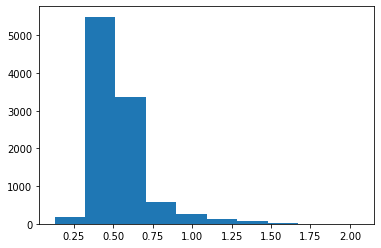

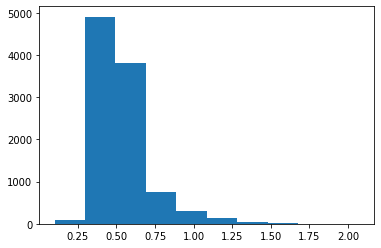




 ****************************** FOLD: 1 ******************************
Feature size 31965, sample size 3997


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


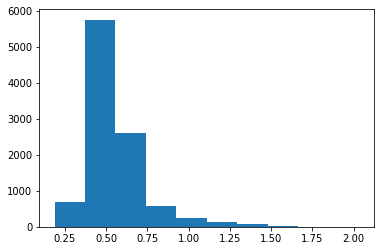

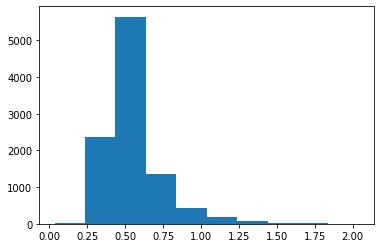




 ****************************** FOLD: 2 ******************************
Feature size 32244, sample size 3997


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


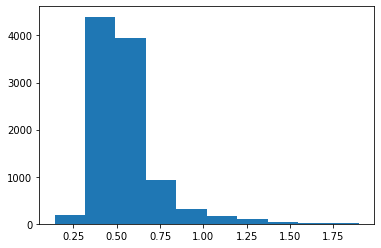

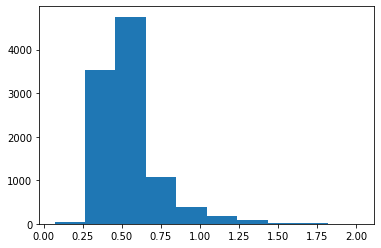

In [31]:

validation = pd.read_csv("/content/drive/MyDrive/Jigsaw/validation_cleaned.csv")

first_preds = np.zeros((validation.shape[0], n_folds))
second_preds = np.zeros((validation.shape[0], n_folds))
n_folds = 3
for fold in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fold} ******************************')
    df_train = pd.read_csv(f"/content/drive/MyDrive/Jigsaw/ruddit_train_fld{fold}.csv")
    union = FeatureUnion([
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
    ])
    features_train = union.fit_transform(df_train["text"])
    features_size = features_train.shape[1]
    sample_size = features_train.shape[0]
    print(f"Feature size {features_size}, sample size {sample_size}")
    features_first = union.transform(validation["first"])
    features_second = union.transform(validation["second"])

    first_test = Variable(torch.Tensor(features_first.toarray()))
    second_test = Variable(torch.Tensor(features_second.toarray()))

    net = LinearRegressor(n_feature=features_size, n_hidden=10, n_output=1)     # define the network
    net.load_state_dict(torch.load(f"/content/drive/MyDrive/Jigsaw/ruddit-linear-{fold}.bin"))
    with torch.no_grad():
      first_prediction = net(first_test)
      first_prediction = first_prediction.cpu().detach().numpy().reshape((-1,))
      plt.hist(first_prediction)
      plt.show()
      second_prediction = net(second_test)
      second_prediction = second_prediction.cpu().detach().numpy().reshape((-1,))
      plt.hist(second_prediction)
      plt.show()
      first_preds[:,fold] = first_prediction
      second_preds[:,fold] = second_prediction

In [33]:
first = first_preds.mean(axis=1)
second = second_preds.mean(axis=1)

validation["more_toxic_pred"] = np.where(first > second, 1, 0)
validation_correct = validation[validation["more_toxic_pred"] == validation["more_toxic"]]

print(f'Correct validation pairs are {len(validation_correct)}')
print(f'Total validation pairs are {len(validation)}')
print(f'Count accuracy {len(validation_correct) / len(validation)}')
print(f'Validation Score is {validation_correct["score"].sum()}')
print(f'Validation Total Score is {validation["score"].sum()}')
print(f'Validation Score Accuracy is {validation_correct["score"].sum() / validation["score"].sum()}')

Correct validation pairs are 6581
Total validation pairs are 10108
Count accuracy 0.6510684606252474
Validation Score is 2271.9352
Validation Total Score is 3286.8433999999997
Validation Score Accuracy is 0.6912210055398441
